In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#load movie data
cleaned_movies = pd.read_csv("cleaned_movies.csv")

# Print the first few rows of the DataFrame
print(cleaned_movies.head())

                                              poster  \
0  https://m.media-amazon.com/images/S/sash/4Fyxw...   
1  https://m.media-amazon.com/images/S/sash/4Fyxw...   
2  https://m.media-amazon.com/images/S/sash/4Fyxw...   
3  https://m.media-amazon.com/images/S/sash/4Fyxw...   
4  https://m.media-amazon.com/images/S/sash/4Fyxw...   

                      title certificate  runtime                      genre  \
0  The Shawshank Redemption          15    142.0                      Drama   
1           The Dark Knight         12A    152.0       Action, Crime, Drama   
2                 Inception         12A    148.0  Action, Adventure, Sci-Fi   
3                Fight Club          18    139.0                      Drama   
4              Pulp Fiction          18    154.0               Crime, Drama   

   rating                                              about  \
0     9.3  Two imprisoned men bond over a number of years...   
1     9.0  When the menace known as the Joker wreaks havo...

In [4]:
# Drop non-numeric columns if they still exist (e.g., titles or descriptions)
movies_clean = cleaned_movies.select_dtypes(include=['float64', 'int64'])

# Display the first few rows
print(movies_clean.head())

   runtime  rating      votes  gross_earn  star_count  director_avg_earn
0    142.0     9.3  2626905.0       28.34           4          54.635000
1    152.0     9.0  2598173.0      534.86           4         201.832222
2    148.0     8.8  2304062.0      292.58           4         201.832222
3    139.0     8.8  2071088.0       37.03           4          86.519000
4    154.0     8.9  2011013.0      107.93           4          78.026250


In [5]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
movies_scaled = scaler.fit_transform(movies_clean)


In [6]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Try 3 clusters as an initial guess
cleaned_movies['cluster'] = kmeans.fit_predict(movies_scaled)

# Check the number of movies per cluster
print(cleaned_movies['cluster'].value_counts())


cluster
0    2437
1    2135
2     428
Name: count, dtype: int64


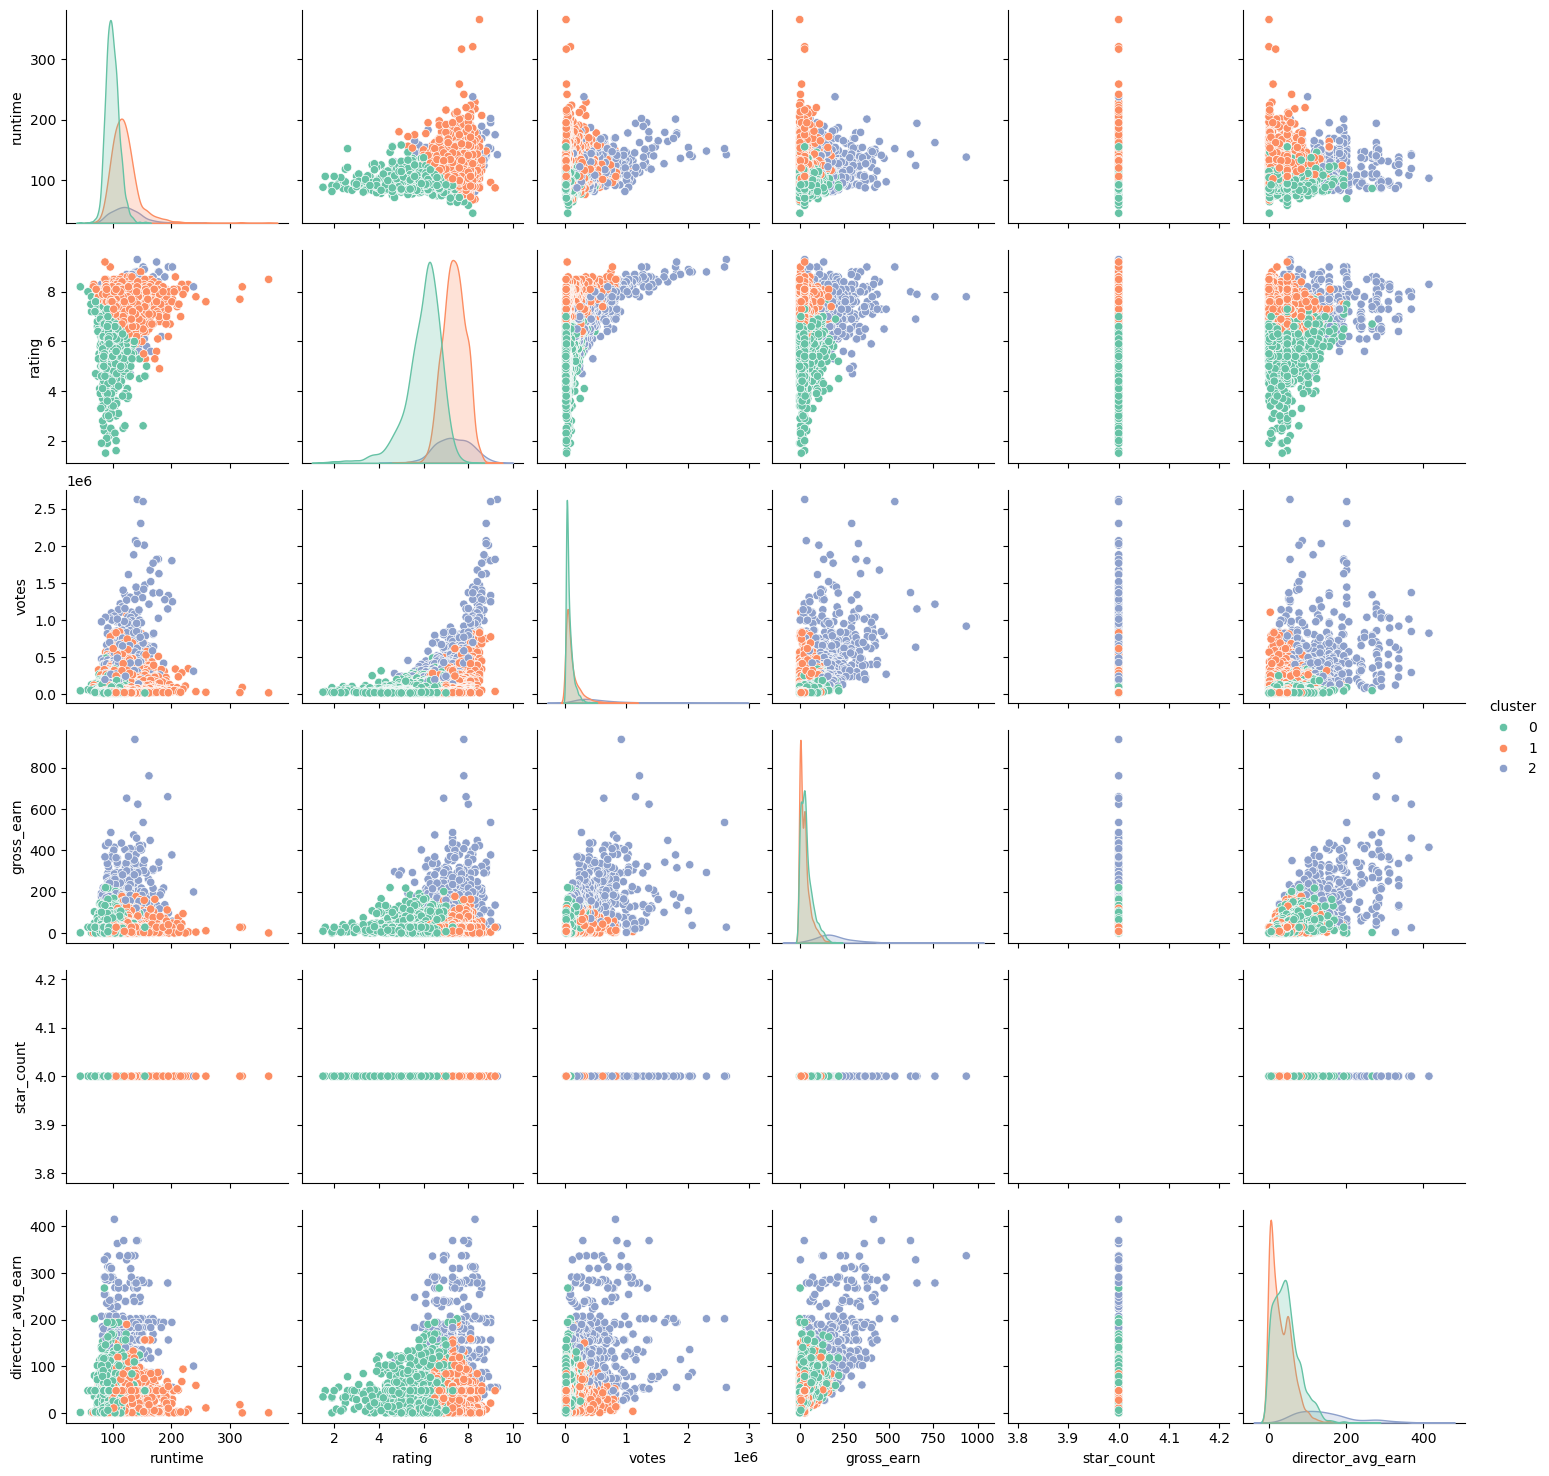

In [7]:
# Visualize clusters using a pairplot
sns.pairplot(cleaned_movies, hue='cluster', palette='Set2')
plt.show()

Overall Interpretation:

The pairplot visualizes the pairwise relationships between different numerical features in your dataset.
Each subplot shows the scatter plot between two features, along with the marginal distributions of each feature.
The points in the scatter plots are colored based on the cluster labels.
Cluster-wise Interpretation:

Cluster 0: This cluster appears to have movies with lower runtime, rating, votes, gross_earn, and director_avg_earn.
Cluster 1: This cluster appears to have movies with higher rating, votes, and gross_earn, but lower runtime and director_avg_earn.
Cluster 2: This cluster appears to have movies with higher runtime, votes, gross_earn, and director_avg_earn.
Potential Insights:

The clusters seem to be separating movies based on their overall quality and commercial success.
Cluster 2 represents the most successful movies, with high ratings, votes, earnings, and director's average earnings.
Cluster 0 represents the least successful movies, with low ratings, votes, and earnings.
Cluster 1 might represent a mix of movies with moderate success.
Further Analysis:

We could explore the distribution of categorical features (if any) within each cluster to identify any patterns.
We could also analyze the movies within each cluster to identify any specific genres or themes that might be associated with each cluster.

In [8]:
print(kmeans.cluster_centers_.shape)


(3, 6)


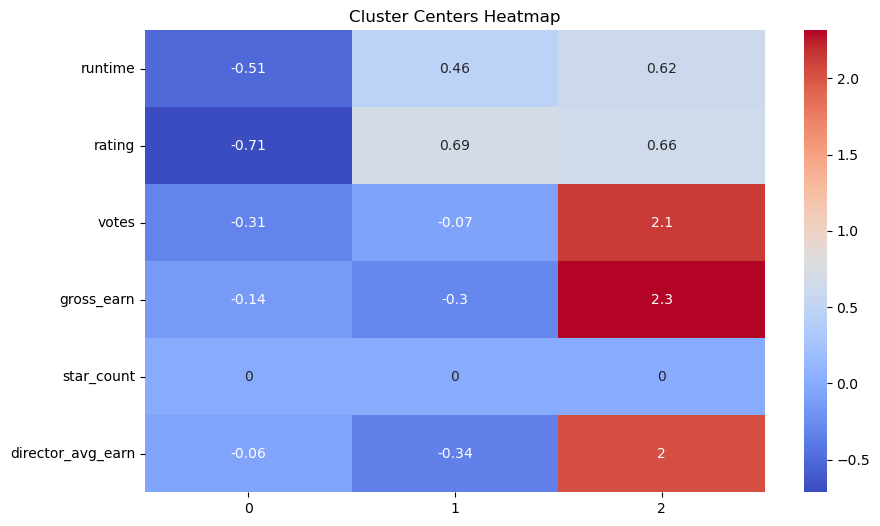

In [9]:
# Calculate the mean of each feature for each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=movies_clean.columns)

# Plot a heatmap of cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers.T, annot=True, cmap="coolwarm")
plt.title("Cluster Centers Heatmap")
plt.show()


The heatmap visualizes the values of different features for each cluster center.
The color intensity represents the magnitude of the value, with red indicating positive values and blue indicating negative values.
Cluster-wise Interpretation:

Cluster 0:

Lower values for runtime, rating, and votes.
Slightly negative values for gross_earn and director_avg_earn.
Cluster 1:

Mixed values, with some features having positive values and some having negative values.
Slightly negative values for runtime, rating, votes, gross_earn, and director_avg_earn.
Cluster 2:

Higher values for runtime, rating, votes, and gross_earn.
Positive value for director_avg_earn.
Potential Insights:

Movies in Cluster 0 might be shorter, lower-rated, less voted, and have lower earnings compared to other clusters.
Movies in Cluster 2 might be longer, higher-rated, more voted, and have higher earnings compared to other clusters.
Cluster 1 seems to have a mix of characteristics and might represent a diverse group of movies.

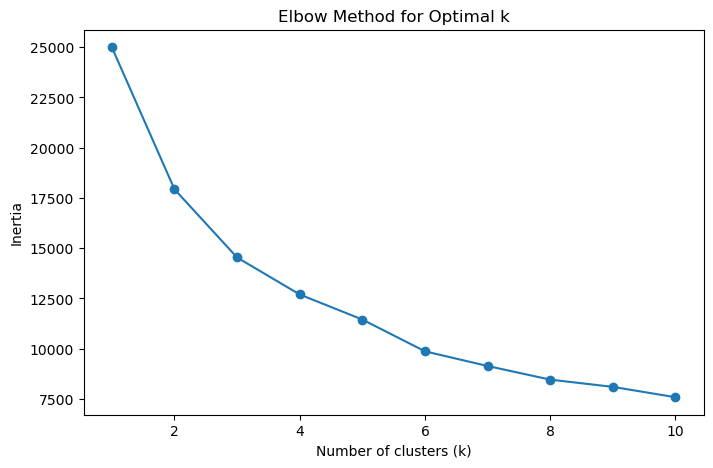

In [10]:
# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(movies_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Overall Interpretation:

The elbow plot shows the relationship between the number of clusters (k) and the within-cluster sum of squares (inertia). The goal is to find the "elbow point" where the decrease in inertia starts to level off. This point suggests the optimal number of clusters for the data.
Specific Observations:

Steep Drop: Initially, as the number of clusters increases, the inertia decreases rapidly. This indicates that each additional cluster is significantly reducing the variability within the clusters.
Elbow Point: Around k=4, the curve starts to flatten out. This is a potential "elbow point" where adding more clusters doesn't significantly reduce the inertia.
Gradual Decrease: Beyond the elbow point, the decrease in inertia becomes more gradual, suggesting that adding more clusters might not be adding much value.
Interpretation of the Elbow Point (k=4):

The elbow point at k=4 suggests that using 4 clusters might be a good choice for this dataset. This means that the data can be divided into 4 distinct groups, each with relatively low internal variability.

Important Considerations:

Domain Knowledge: The optimal number of clusters can also depend on domain knowledge and the specific goals of the analysis. Sometimes, a different number of clusters might be more meaningful based on the context.
Other Methods: While the elbow method is a common approach, other methods like the silhouette method can also be used to determine the optimal number of clusters.
Additional Insights:

Cluster Analysis: Once we've determined the optimal number of clusters, we can considor using clustering algorithms like K-means or hierarchical clustering to group the data points into these clusters.
Cluster Interpretation: We can analyze the characteristics of each cluster to understand the underlying patterns and relationships within the data.

In [ ]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
#!pip install imbalanced-learn



In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [14]:
print(cleaned_movies.columns)


Index(['poster', 'title', 'certificate', 'runtime', 'genre', 'rating', 'about',
       'director', 'stars', 'votes', 'gross_earn', 'star_count',
       'director_avg_earn', 'cluster'],
      dtype='object')


In [15]:
#pip install --upgrade xgboost


In [16]:
#pip show xgboost


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

cleaned_movies['is_good'] = (cleaned_movies['rating'] >= 7.0).astype(int)
y = cleaned_movies['is_good']


# Use numeric features from movies_clean
X = movies_clean
y = cleaned_movies['is_good']

# Step 1: Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to the training data (unscaled)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 3: Scale numeric features (fit on training set only)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)

# Step 4: Define parameter grid for hyperparameter tuning
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Initialize GridSearchCV with XGBoost and the parameter grid
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', early_stopping_rounds=10),
    param_grid=params,
    scoring='roc_auc',
    cv=cv
)

# Step 6: Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_res_scaled, y_train_res, eval_set=[(X_val_scaled, y_val)], verbose=False)

# Step 7: Get the best model
best_model = grid_search.best_estimator_

# Step 8: Evaluate the model
y_pred = best_model.predict(X_val_scaled)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Step 9: Calculate and print ROC-AUC score
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]
roc_score = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")

# Step 10: Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00       428

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

ROC-AUC Score: 1.00
Confusion Matrix:
[[572   0]
 [  0 428]]


In [62]:
# Use available columns in cleaned_movies
features = ['rating', 'runtime', 'votes', 'gross_earn', 'star_count', 'director_avg_earn', 'cluster']

# Check if these columns are in cleaned_movies
X = cleaned_movies[features]
y = cleaned_movies['is_good']

# Step 1: Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale numeric features (train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 3: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Define parameter grid for hyperparameter tuning
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Initialize GridSearchCV with XGBoost and the parameter grid
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective = 'binary:logistic',
        eval_metric='logloss', 
    ),
    param_grid=params,
    scoring='roc_auc', 
    cv=cv
)

# Step 6: Fit with validation data (WITHOUT early stopping)
grid_search.fit(
    X_train_res, y_train_res,
    eval_set=[(X_val_scaled, y_val)],
    verbose=True  # No early stopping
)

# Step 7: Get the best model
best_model = grid_search.best_estimator_

# Step 8: Evaluate the model
y_pred = best_model.predict(X_val_scaled)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Step 9: Calculate and print ROC-AUC score
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]
roc_score = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")


[0]	validation_0-logloss:0.68329
[1]	validation_0-logloss:0.67361
[2]	validation_0-logloss:0.66415
[3]	validation_0-logloss:0.65487
[4]	validation_0-logloss:0.64577
[5]	validation_0-logloss:0.63683
[6]	validation_0-logloss:0.62807
[7]	validation_0-logloss:0.61946
[8]	validation_0-logloss:0.61102
[9]	validation_0-logloss:0.60273
[10]	validation_0-logloss:0.59458
[11]	validation_0-logloss:0.58659
[12]	validation_0-logloss:0.57874
[13]	validation_0-logloss:0.57103
[14]	validation_0-logloss:0.56345
[15]	validation_0-logloss:0.55601
[16]	validation_0-logloss:0.54870
[17]	validation_0-logloss:0.54152
[18]	validation_0-logloss:0.53447
[19]	validation_0-logloss:0.52753
[20]	validation_0-logloss:0.52071
[21]	validation_0-logloss:0.51400
[22]	validation_0-logloss:0.50740
[23]	validation_0-logloss:0.50092
[24]	validation_0-logloss:0.49454
[25]	validation_0-logloss:0.48826
[26]	validation_0-logloss:0.48209
[27]	validation_0-logloss:0.47601
[28]	validation_0-logloss:0.47004
[29]	validation_0-loglos

In [67]:
print(X_train.describe())
print(X_val.describe())


            rating      runtime         votes   gross_earn  star_count  \
count  4000.000000  4000.000000  4.000000e+03  4000.000000      4000.0   
mean      6.695450   110.406250  1.407228e+05    47.746990         4.0   
std       0.974154    21.281681  2.057826e+05    65.967556         0.0   
min       1.500000    45.000000  1.848700e+04     0.000000         4.0   
25%       6.100000    96.000000  3.742000e+04     8.180000         4.0   
50%       6.800000   106.000000  6.971150e+04    28.000000         4.0   
75%       7.400000   120.000000  1.497628e+05    58.177500         4.0   
max       9.200000   321.000000  2.598173e+06   936.660000         4.0   

       director_avg_earn      cluster  
count        4000.000000  4000.000000  
mean           47.949710     0.139750  
std            48.579190     0.387631  
min             0.000000     0.000000  
25%            14.241667     0.000000  
50%            37.790000     0.000000  
75%            63.708000     0.000000  
max          

In [63]:
# Check the column names in X_train and X_val
print(X_train.columns)  # Check columns in the training set
print(X_val.columns)  # Check columns in the validation se

Index(['rating', 'runtime', 'votes', 'gross_earn', 'star_count',
       'director_avg_earn', 'cluster'],
      dtype='object')
Index(['rating', 'runtime', 'votes', 'gross_earn', 'star_count',
       'director_avg_earn', 'cluster'],
      dtype='object')


In [64]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [69]:
# Step 0: Select features (excluding 'cluster')
features = ['rating', 'runtime', 'votes', 'gross_earn', 'star_count', 'director_avg_earn']

# Step 1: Define X and y
X = cleaned_movies[features]
y = cleaned_movies['is_good']

# Step 2: Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Preprocess numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Hyperparameter tuning with GridSearchCV
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
    param_grid=params,
    scoring='roc_auc',
    cv=cv
)

# Step 6: Fit the model
grid_search.fit(X_train_res, y_train_res)

# Step 7: Evaluate the model
best_model = grid_search.best_estimator_

# Validation predictions and metrics
y_pred = best_model.predict(X_val_scaled)
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred))

roc_score = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       458

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

ROC-AUC Score: 1.00


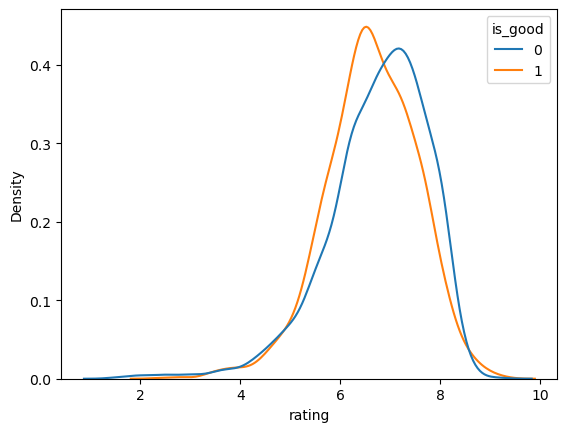

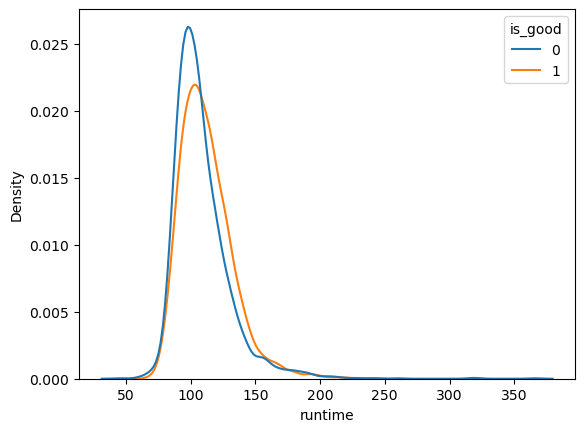

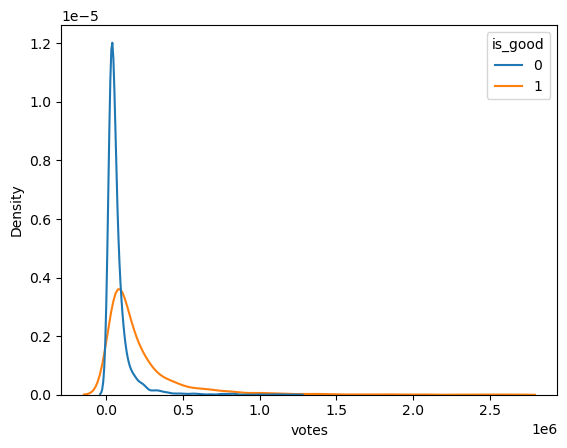

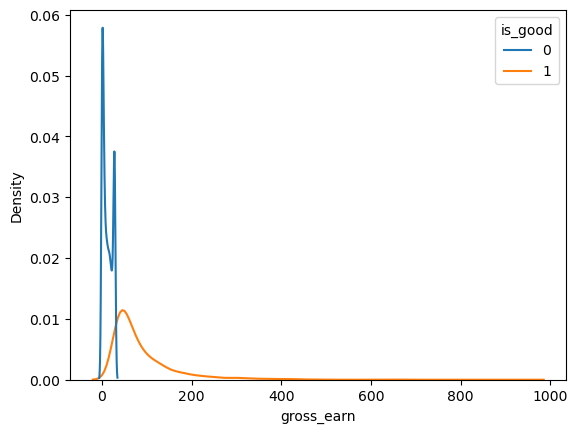

C:\Users\bekah\AppData\Local\Temp\ipykernel_3212\2605402061.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cleaned_movies, x=feature, hue='is_good', common_norm=False)


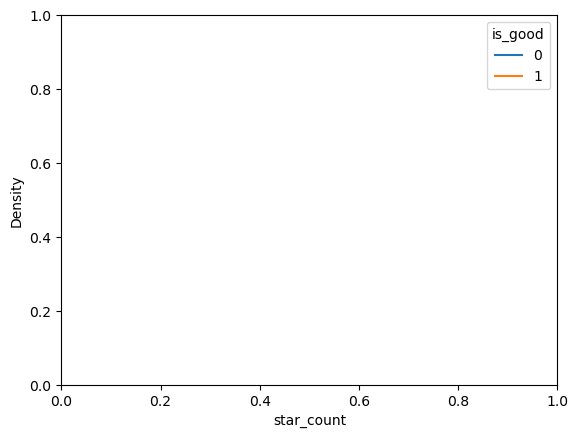

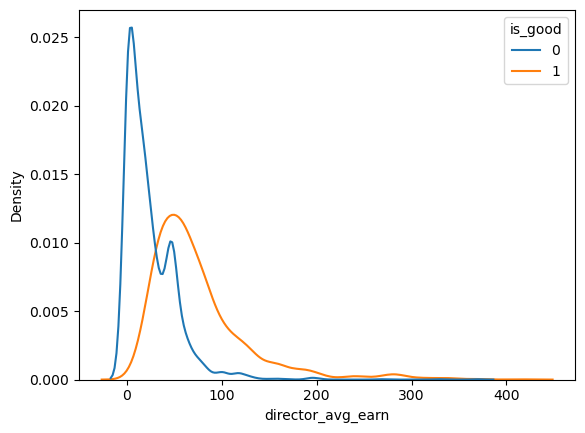

In [70]:
for feature in features:
    sns.kdeplot(data=cleaned_movies, x=feature, hue='is_good', common_norm=False)
    plt.show()


With my first model, I got an ROC-AUC score of 50% this model is not better than guessing if a movie is 'good'.  With my next model, there was some overfitting and I got a perfect ROC-AUC score of 1.  I might try to tweak different input variables and set different thresholds to determine if a movie is 'good'.  I need that Golidilocks just right in between my two models. I will try some other classification models and see if I get better results.